# Team Project 3 - Solving a System of Linear Equations

In this project, we compare the performance of three different methods of solving a system of linear equations. The lesson that I hope you may get is that finding an efficient method is not an unneccessary complication.

For this project, <b>DO NOT</b> use the 'solve' method in the linear algebra package! You have to make your own code for it. 

#### 1. (10 pts) Create a function randmat(n) which returns a random square matrix constructed as the following recipe. 
<ul>
    <li>The size of the matrix is $n \times n$.</li>
    <li>Each off-diagonal entry ($a_{ij}$ where $i \ne j$) is a random number in $[0, 1)$. A random number can be constructed by the random method (see <a href="https://docs.scipy.org/doc/numpy/reference/routines.random.html">here</a>).</li>
    <li>A diagonal entry $a_{ii}$ is a random number in $[n, n+1)$. (This condition guarantees that the matrix $(a_{ij})$ is strictly diagonally dominant, hence invertible.)</li>
</ul>

#### And create a function randvec(n) which returns an $n$-dimensional random vector whose entries are random numbers in $[0, 100)$. 

In [46]:
import numpy as np

def randmat(n):
    mat = np.random.rand(n, n)
    for i in range(n):
        mat[i][i] += n
    return mat

def randvec(n):
    arr = 100*np.random.rand(n)
    return arr

A = randmat(4)
b = randvec(4)
print("A = ", A)
print("b = ", b)

A =  [[4.13783224 0.20509709 0.04689382 0.41850358]
 [0.99017811 4.83702598 0.5074731  0.34670836]
 [0.51975911 0.06499233 4.54585651 0.44653201]
 [0.06325019 0.93189435 0.86240677 4.85250391]]
b =  [95.3736683  31.28813849 23.96749767 37.33434112]


#### 2. (10 pts) Create a function GaussElim(A, b) which solves a system of linear equations $Ax = b$ by using Gaussian Elimination with the partial pivoting.

In [47]:
def swapRow(r1, r2):
    temp = r1
    r1 = r2
    r2 = temp

def GaussElim(A, b):
    size = len(A)
    x = []
    for j in range(size):
        maxVal = A[j][j]
        maxRow = j
        for i in range(j, size):
            if abs(A[i][j]) > maxVal:
                maxRow = i
        swapRow(A[maxRow], A[j])
        for i in range(j+1, size):
            A[i] -= (A[i][j]/A[j][j])*(A[j])
#     print(A)
#     print(b)
    for j in range(size):
        xn = b[size-j-1]/A[size-j-1][size-j-1]
        x.append(xn)
        for i in range(size-j-1):
            b[i] -= A[i][size-j-1]*xn       
    return x[::-1]

# Testing part
C = randmat(4)
for i in range(4):
    for j in range(4):
        C[i,j] = A[i,j]
x = GaussElim(A, b)
print(A)
print(C)
print(x)
print(np.matmul(C,x))

[[ 4.13783224e+00  2.05097091e-01  4.68938157e-02  4.18503583e-01]
 [ 0.00000000e+00  4.78794650e+00  4.96251467e-01  2.46560974e-01]
 [ 0.00000000e+00 -6.93889390e-18  4.53590010e+00  3.91942980e-01]
 [ 0.00000000e+00  1.17093014e-18  0.00000000e+00  4.73213926e+00]]
[[4.13783224 0.20509709 0.04689382 0.41850358]
 [0.99017811 4.83702598 0.5074731  0.34670836]
 [0.51975911 0.06499233 4.54585651 0.44653201]
 [0.06325019 0.93189435 0.86240677 4.85250391]]
[21.918953588450243, 5.651488773515014, 4.602229426450809, 7.889527131874038]
[95.3736683  54.1109386  36.20388021 48.90592356]


#### 3. (10 pts) Create a function Jacobi(A, b, err) which solves a system of linear equations $Ax = b$ by using Jacobi interation method. Set $x^{(0)} = \vec{0}$. We stop the iteration when the estimation of the error $||x^{(k)} - x^{(k-1)}||_\infty$ is less than err or $k = 1000$. (Here $x^{(k)}$ is the $k$-th output of the iteration).

In [48]:
def Jacobi(A, b, err):
    size = len(A)
    iterations = 0
    x = []
    xPrev = []
    bPrime = []
#     print(A)
#     print(b)
    for i in range(size):
        x.append(0)
        xPrev.append(0)
        bPrime.append(0)
    maxErr = 10000000
    while maxErr > err and iterations < 1000:
        maxErr = 0
        for i in range(size):
            xPrev[i] = x[i]
            bPrime[i] = b[i]
            for j in range(size):
                if i != j:
                    bPrime[i] -= A[i][j]*xPrev[j]
            x[i] = (bPrime[i])/A[i][i]
            if abs(x[i]-xPrev[i]) > maxErr:
                maxErr = abs(x[i]-xPrev[i])
        iterations += 1
#         print(iterations)
#         print(x)
    return x

sol = Jacobi(C, b, 0.000001)
print(C)
print(b)
print(sol)

[[4.13783224 0.20509709 0.04689382 0.41850358]
 [0.99017811 4.83702598 0.5074731  0.34670836]
 [0.51975911 0.06499233 4.54585651 0.44653201]
 [0.06325019 0.93189435 0.86240677 4.85250391]]
[90.69695292 27.05902589 20.8752529  37.33434112]
[21.16028475879675, 0.6033285147088722, 1.47255163078772, 7.040442181216111]


#### 4. (10 pts) Create a function GaussSeidel(A, b, err) which solves a system of linear equations $Ax = b$ by using Gauss-Seidel interation method. Set $x^{(0)} = \vec{0}$. We stop the iteration when the estimation of the error $||x^{(k)} - x^{(k-1)}||_\infty$ is less than err or $k = 1000$. (Here $x^{(k)}$ is the $k$-th output of the iteration).

In [49]:
def GaussSeidel(A, b, err):
    size = len(A)
    iterations = 0
    x = []
    xPrev = []
    bPrime = []
#     print(A)
#     print(b)
    for i in range(size):
        x.append(0)
        xPrev.append(0)
        bPrime.append(0)
    maxErr = 10000000
    while maxErr > err and iterations < 1000:
        maxErr = 0
        for i in range(size):
            xPrev[i] = x[i]
            bPrime[i] = b[i]
            for j in range(size):
                if i != j:
                    bPrime[i] -= A[i][j]*x[j]
            x[i] = (bPrime[i])/A[i][i]
            if abs(x[i]-xPrev[i]) > maxErr:
                maxErr = abs(x[i]-xPrev[i])
        iterations += 1
        #print(iterations)
        #print(x)
    return x

sol = GaussSeidel(C, b, 0.000001)
print(C)
print(b)
print(sol)

[[4.13783224 0.20509709 0.04689382 0.41850358]
 [0.99017811 4.83702598 0.5074731  0.34670836]
 [0.51975911 0.06499233 4.54585651 0.44653201]
 [0.06325019 0.93189435 0.86240677 4.85250391]]
[90.69695292 27.05902589 20.8752529  37.33434112]
[21.160284677070386, 0.6033283467069862, 1.4725514902555876, 7.040442005135349]


#### 5. (10 pts) For $n = 100, 200, 300, \cdots , 1000$, create a random $n \times n$ matrix $A$ and a random $n$-dimensional vector $b$. Solve the system of linear equations $Ax = b$ by using GaussElim(A, b), Jacobi(A, b, err), and GaussSeidel(A, b, err). Use $10^{-6}$ for the error tolerance. Record the excution time for each method. Plot the graph of the excution time for those three methods on the same plane.

For the computation of the excution time, you may use the following method:

Matrix Size: 100
Executing Jacobi Iteration Method ...
Execution time: 0.12897706031799316 seconds
Executing Gauss-Seidel Iteration Method ...
Execution time: 0.03692793846130371 seconds
Executing Gaussian Elimination ...
Execution time: 0.02081894874572754 seconds
Matrix Size: 200
Executing Jacobi Iteration Method ...
Execution time: 0.4698789119720459 seconds
Executing Gauss-Seidel Iteration Method ...
Execution time: 0.12431716918945312 seconds
Executing Gaussian Elimination ...
Execution time: 0.08072209358215332 seconds
Matrix Size: 300
Executing Jacobi Iteration Method ...
Execution time: 1.0212092399597168 seconds
Executing Gauss-Seidel Iteration Method ...
Execution time: 0.3297090530395508 seconds
Executing Gaussian Elimination ...
Execution time: 0.19097495079040527 seconds
Matrix Size: 400
Executing Jacobi Iteration Method ...
Execution time: 1.7742359638214111 seconds
Executing Gauss-Seidel Iteration Method ...
Execution time: 0.5238590240478516 seconds
Executing Gaussian E

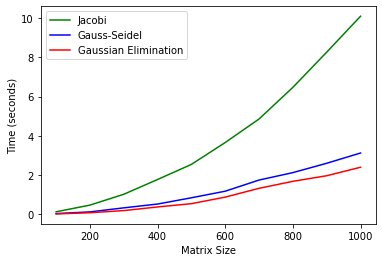

In [182]:
import time
import matplotlib.pyplot as plt

arr = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
t1 = []
t2 = []
t3 = []

for i in range(len(arr)): 
    mat = randmat(arr[i])
    b = randvec(arr[i])

    print("Matrix Size:", arr[i])
    
    print("Executing Jacobi Iteration Method ...")
    start = time.time()
    Jacobi(mat,b,0.000001)
    end = time.time()
    t1.append(end - start)
    print("Execution time:", end - start, "seconds")

    print("Executing Gauss-Seidel Iteration Method ...")
    start = time.time()
    GaussSeidel(mat,b,0.000001)
    end = time.time()
    t2.append(end - start)
    print("Execution time:", end - start, "seconds")
    
    print("Executing Gaussian Elimination ...")
    start = time.time()
    GaussElim(mat,b)
    end = time.time()
    t3.append(end-start)
    print("Execution time:", end - start,"seconds")

plt.plot(arr, t1, label = 'Jacobi', color = 'green') 
plt.plot(arr, t2, label = 'Gauss-Seidel', color = 'blue')
plt.plot(arr, t3, label = 'Gaussian Elimination', color = 'red')
plt.xlabel('Matrix Size')
plt.ylabel('Time (seconds)')
plt.legend()
plt.show()

If you are interested in, then you can make a code using the "theoretically simplest method". For $Ax = b$, $x = A^{-1}b$. By using Gauss Elimination, you may compute $A^{-1}$ and then compute $A^{-1}b$. Recall that one can compute $A^{-1}$ as the following:
<ul>
    <li>Make an augmented matrix $[A | I]$ where $I$ is the $n \times n$ identity matrix.</li>
    <li>Apply elementary row operations until the left half $A$ on $[A| I]$ becomes $I$.</li>
    <li>Then the right half of the augmented matrix is $A^{-1}$.</li>
</ul>
Compare the performance of this method with above three methods.

1. (10 pts)<br>
2. (5 pts) The Gaussian elimination does not compute the right solution. You need to create an augmented matrix by putting b to A and then apply the row operations. (-5 pts)<br>
3. (10 pts)<br>
4. (10 pts)<br>
5. (10 pts) The actual performance difference between Gaussian elimination and the interative methods will be more significant if you make a valid code for Gaussian elimination. <br>
(10 + 5 + 10 + 10 + 10 = 45)